# Loading Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_ab=pd.read_csv("AB_NYC_2019.csv")

# Basic Analysis

In [3]:
data_ab.shape

(48895, 16)

In [4]:
data_ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df=data_ab.copy()

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Exoploration

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.drop(['name','id','last_review'],axis=1,inplace=True)

In [12]:
df.shape

(48895, 13)

In [13]:
df['host_name'].replace(np.nan,'XYZ',inplace=True)
df['reviews_per_month'].replace(np.nan,'0',inplace=True)

In [14]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Names of Top 10 Hosts

In [15]:
df['host_name'].value_counts()

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
               ... 
Peter Alex        1
Townsend          1
Eni               1
Lizbeth           1
Fig               1
Name: host_name, Length: 11453, dtype: int64

In [16]:
df['host_name'].value_counts().head(10)

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

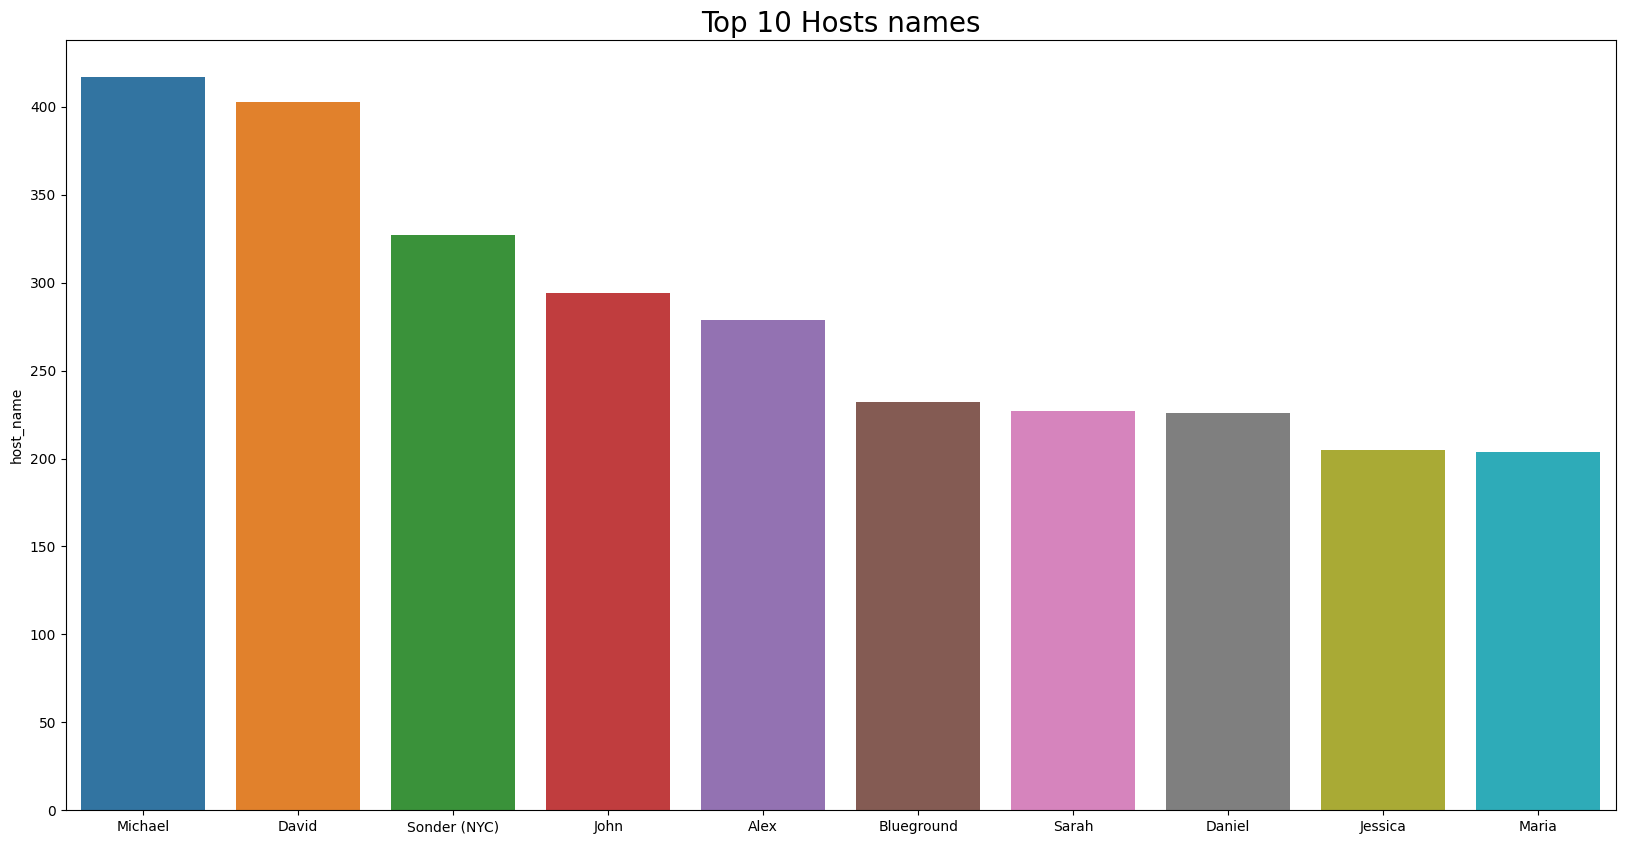

In [17]:
# Barplot of top 10 hosts
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['host_name'].value_counts().head(10).keys(),y=df['host_name'].value_counts().head(10))
plt.title("Top 10 Hosts names",fontsize=20)
plt.show()

# Neighbourhood Groups

In [18]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

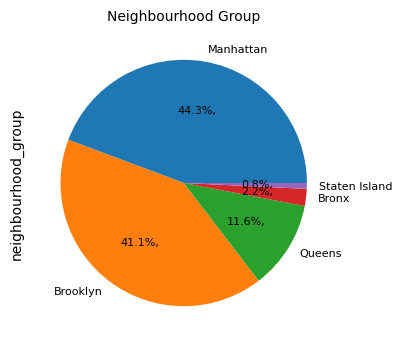

In [19]:
df['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(4,4),autopct='%1.1f%%,' ,fontsize=8)
plt.title("Neighbourhood Group",fontsize=10)
plt.show()

## Neighbourhoods

In [20]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [21]:
df['neighbourhood'].value_counts().tail(10)

Silver Lake        2
West Farms         2
Lighthouse Hill    2
Howland Hook       2
Fort Wadsworth     1
Willowbrook        1
Rossville          1
Richmondtown       1
New Dorp           1
Woodrow            1
Name: neighbourhood, dtype: int64

## Price Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

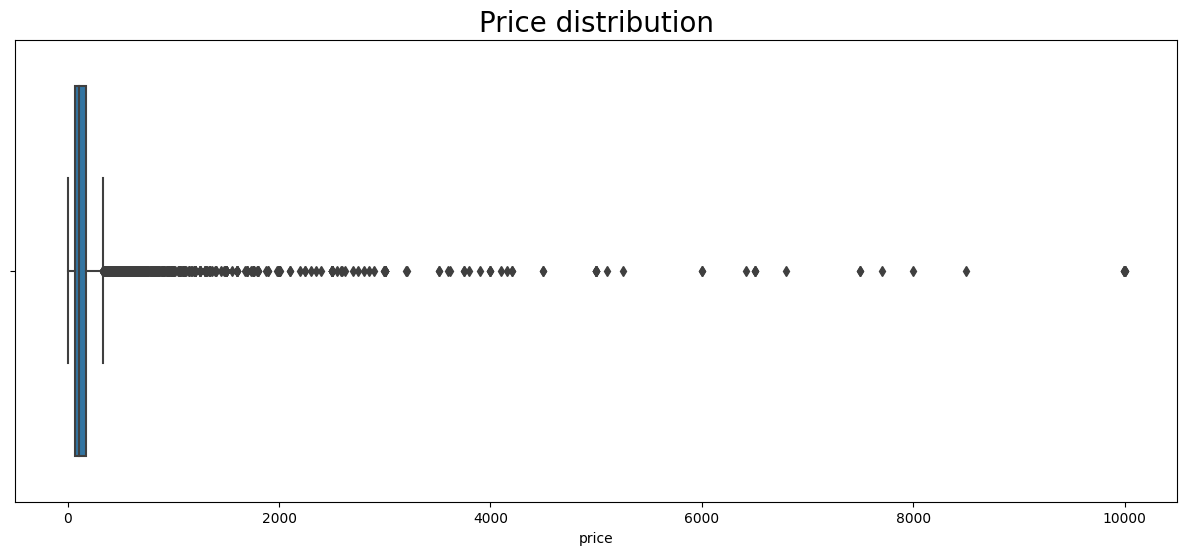

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='price')
plt.title("Price distribution", fontsize=20)
plt.show

In [23]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
Q1=np.percentile(df['price'],25,interpolation='midpoint')
Q3=np.percentile(df['price'],75,interpolation='midpoint')
IQR=Q3-Q1
print('IQR=',IQR)
print('Minimum value=',(Q3-(1.5*(IQR))))
print('Maximum value=',(Q3+(1.5*(IQR))))

IQR= 106.0
Minimum value= 16.0
Maximum value= 334.0


In [25]:
df_new=df[df['price']<334.0]
df_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [26]:
df_new.groupby(["neighbourhood_group"])["price"].describe().T.reset_index()

neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,1070.000000,19415.000000,19501.000000,5567.000000,365.000000
1,mean,77.365421,105.699614,145.904620,88.904437,89.235616
2,std,47.110940,60.937808,70.417743,53.536041,57.700147
3,min,0.000000,0.000000,0.000000,10.000000,13.000000
4,25%,45.000000,60.000000,90.000000,50.000000,50.000000
5,50%,65.000000,90.000000,135.000000,74.000000,75.000000
6,75%,95.000000,140.000000,199.000000,108.000000,105.000000
7,max,325.000000,333.000000,333.000000,325.000000,300.000000


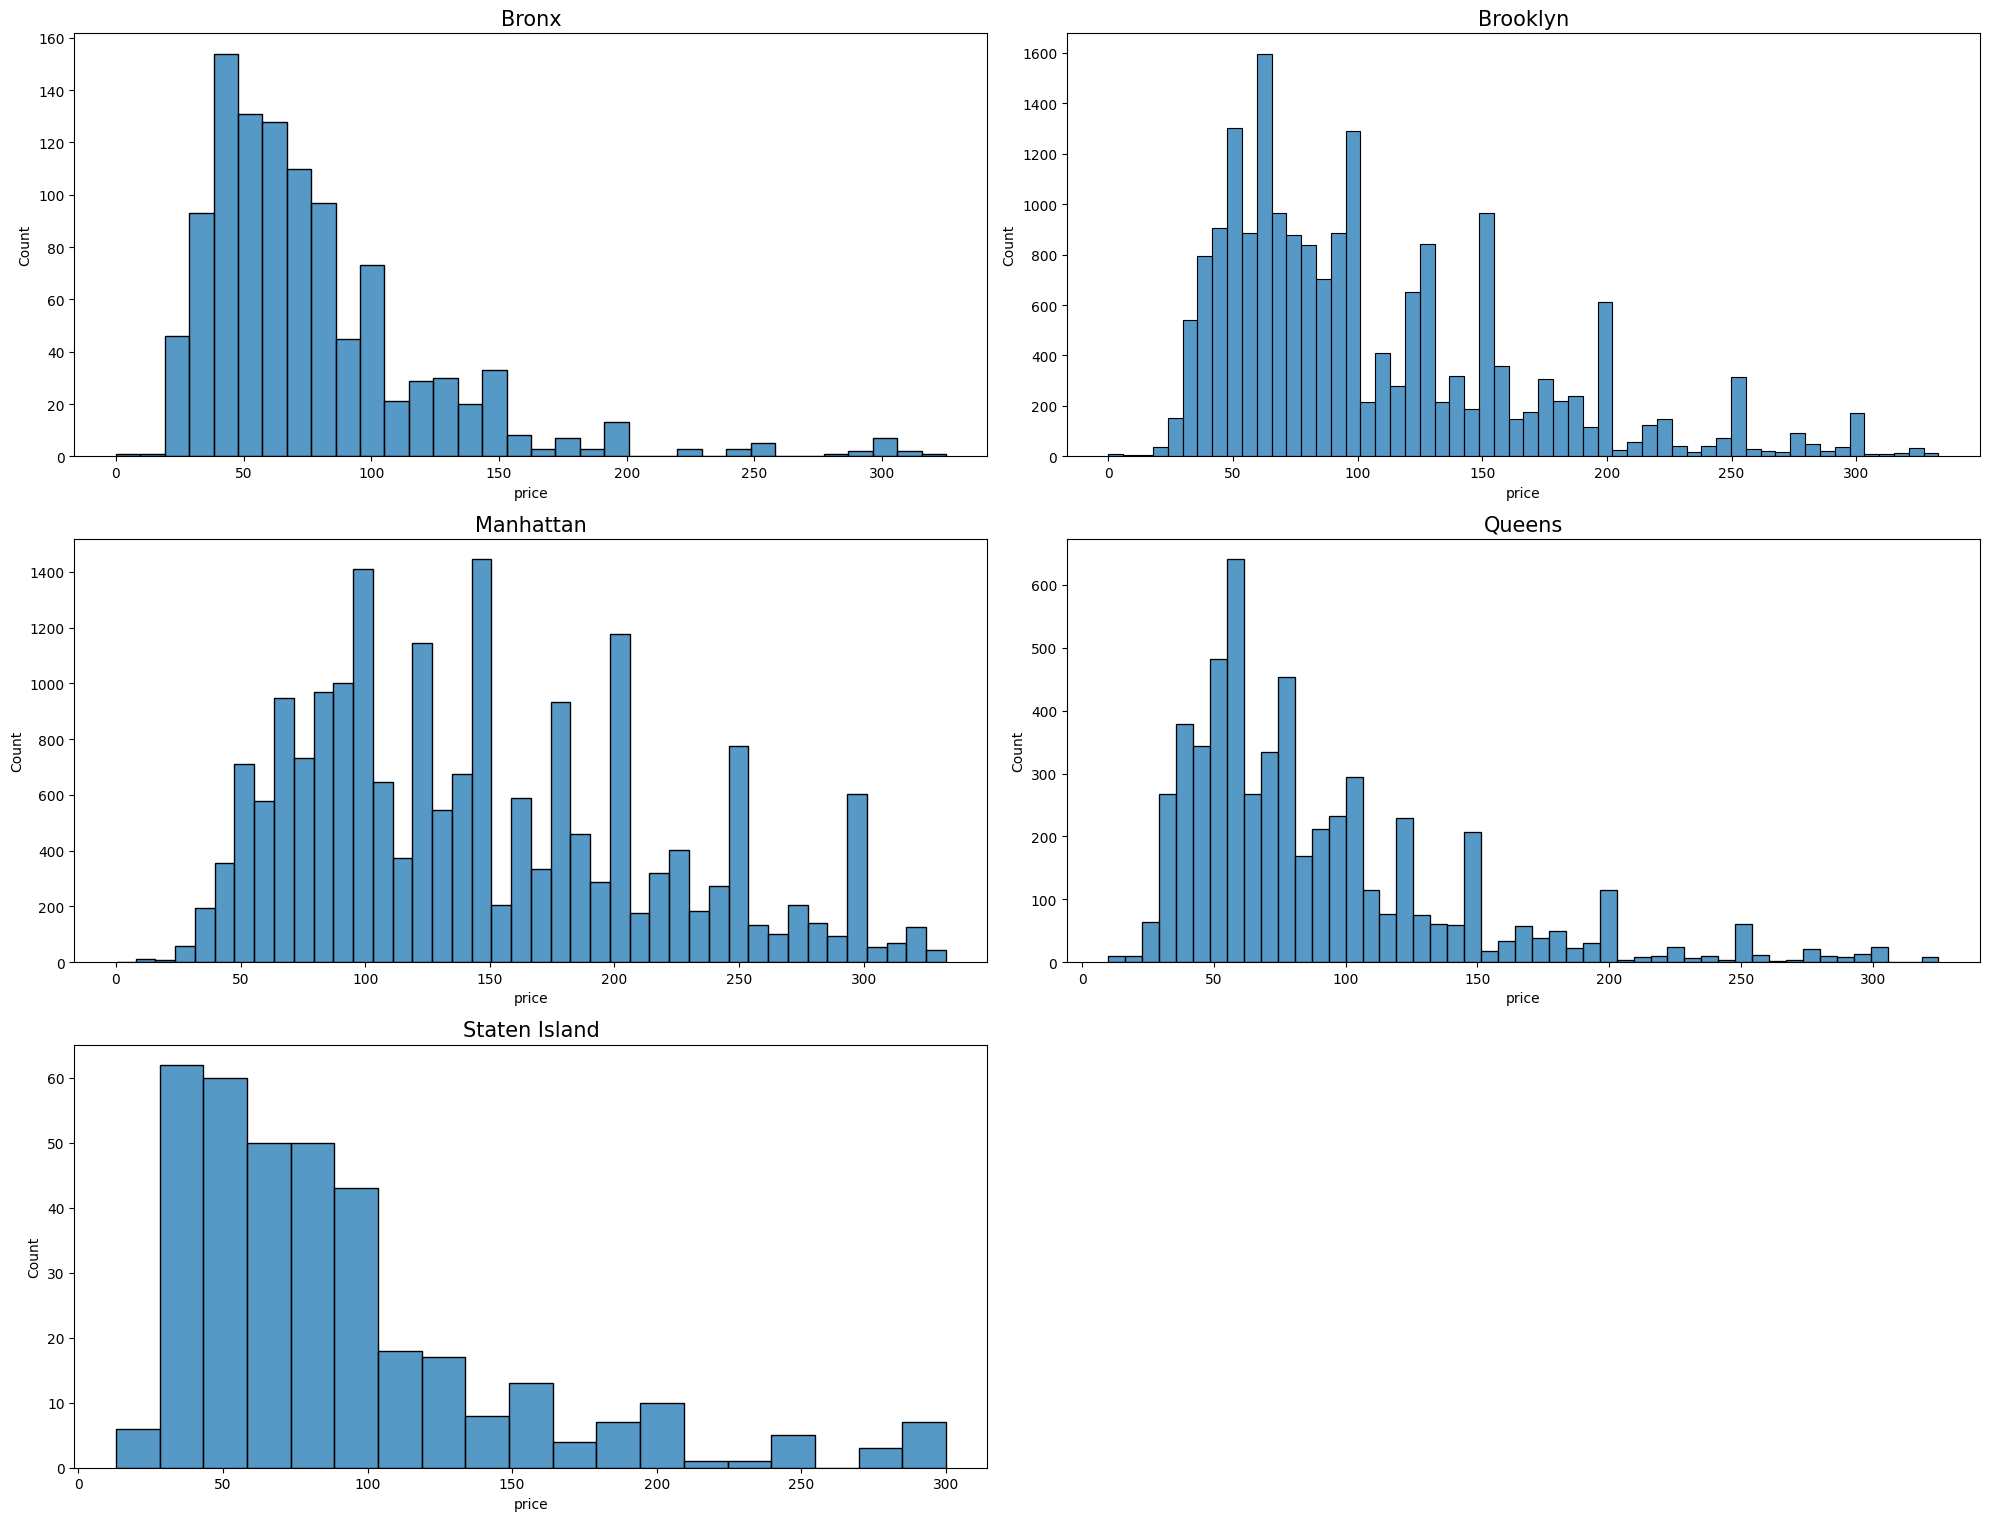

In [27]:
plt.figure(figsize=(20,25))
plt.subplot(5,2,1)
nb1=df_new[df_new["neighbourhood_group"]=='Bronx']
sns.histplot(x=nb1["price"])
plt.title("Bronx",fontsize=15)
plt.subplot(5,2,2)
nb2=df_new[df_new["neighbourhood_group"]=='Brooklyn']
sns.histplot(x=nb2["price"])
plt.title("Brooklyn",fontsize=15)
plt.subplot(5,2,3)
nb3=df_new[df_new["neighbourhood_group"]=='Manhattan']
sns.histplot(x=nb3["price"])
plt.title("Manhattan",fontsize=15)
plt.subplot(5,2,4)
nb4=df_new[df_new["neighbourhood_group"]=='Queens']
sns.histplot(x=nb4["price"])
plt.title("Queens",fontsize=15)
plt.subplot(5,2,5)
nb5=df_new[df_new["neighbourhood_group"]=='Staten Island']
sns.histplot(x=nb5["price"])
plt.title("Staten Island",fontsize=15)
plt.tight_layout()
plt.show()

## Room Type

In [28]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

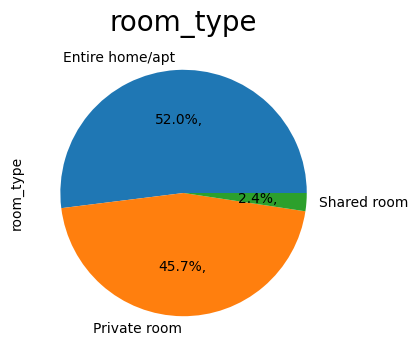

In [29]:
df['room_type'].value_counts().plot(kind='pie',figsize=(4,4),autopct='%1.1f%%,' ,fontsize=10)
plt.title("room_type",fontsize=20)
plt.show()

## Room types and Prices

In [30]:
df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


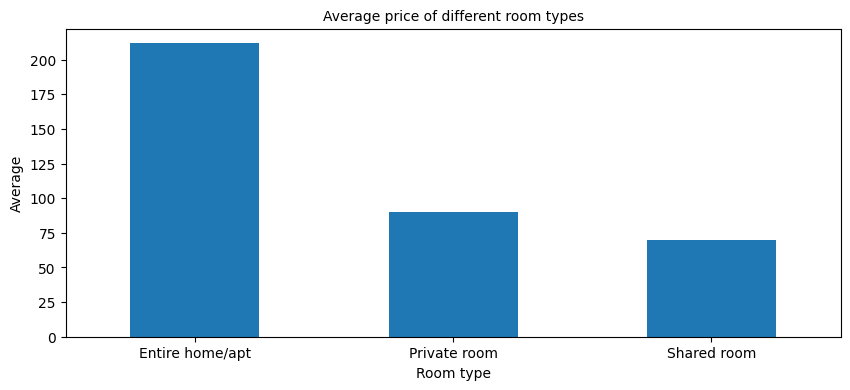

In [31]:
df.groupby(['room_type'])['price'].mean().plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=360)
plt.title("Average price of different room types",fontsize=10)
plt.xlabel("Room type")
plt.ylabel("Average")
plt.show()

In [32]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


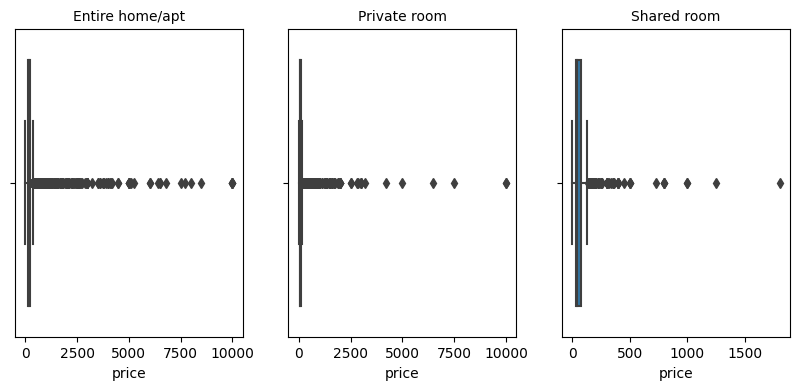

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
entired=df[df["room_type"]=='Entire home/apt']
sns.boxplot(x=entired["price"])
plt.title("Entire home/apt",fontsize=10)

plt.subplot(1,3,2)
private=df[df["room_type"]=='Private room']
sns.boxplot(x=private["price"])
plt.title("Private room",fontsize=10)

plt.subplot(1,3,3)
shared=df[df["room_type"]=='Shared room']
sns.boxplot(x=shared["price"])
plt.title("Shared room",fontsize=10)

plt.show()

## Room types and Minimum Nights

In [34]:
df.groupby(['room_type'])['minimum_nights'].mean().reset_index()

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


In [35]:
round(df.groupby(['room_type'])['minimum_nights'].mean().reset_index(),0)

,room_type,minimum_nights
0,Entire home/apt,9.0
1,Private room,5.0
2,Shared room,6.0


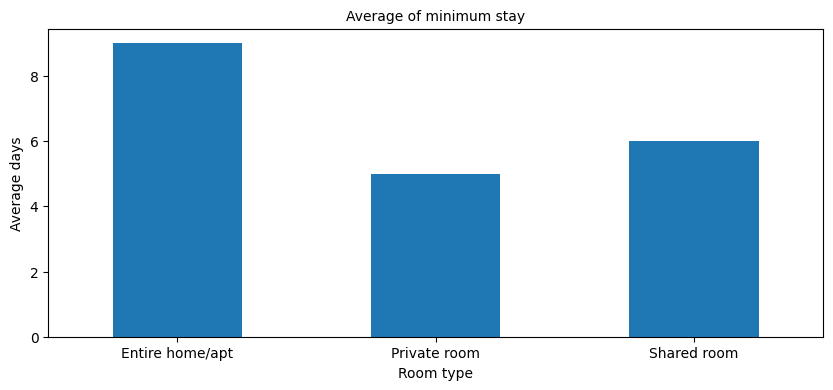

In [36]:
round(df.groupby(['room_type'])['minimum_nights'].mean(),0).plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=360)
plt.title("Average of minimum stay",fontsize=10)
plt.xlabel("Room type")
plt.ylabel("Average days")
plt.show()

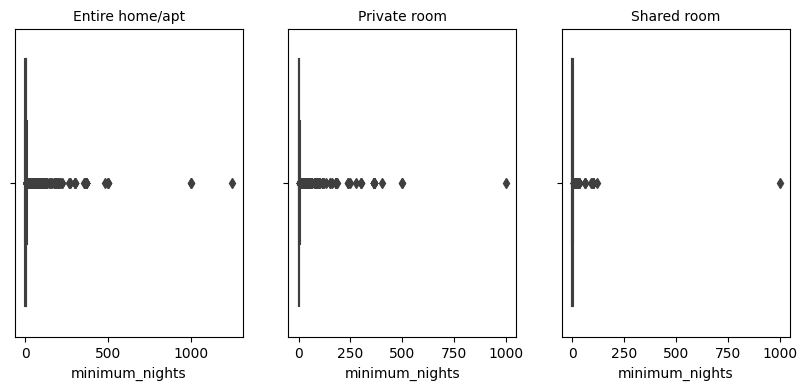

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
entired1=df[df["room_type"]=='Entire home/apt']
sns.boxplot(x=entired1["minimum_nights"])
plt.title("Entire home/apt",fontsize=10)

plt.subplot(1,3,2)
private1=df[df["room_type"]=='Private room']
sns.boxplot(x=private1["minimum_nights"])
plt.title("Private room",fontsize=10)

plt.subplot(1,3,3)
shared1=df[df["room_type"]=='Shared room']
sns.boxplot(x=shared1["minimum_nights"])
plt.title("Shared room",fontsize=10)

plt.show()

## Availabilty

In [38]:
df['availability_365'].value_counts().iloc[:10].sort_index()

0      17533
1        408
2        270
3        306
5        340
89       361
90       290
179      301
364      491
365     1295
Name: availability_365, dtype: int64

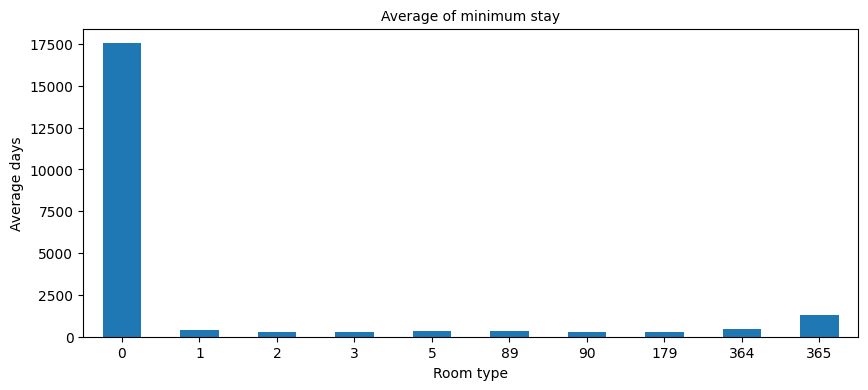

In [39]:
df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=360)
plt.title("Average of minimum stay",fontsize=10)
plt.xlabel("Room type")
plt.ylabel("Average days")
plt.show()

## Neighbourhood Groups and Room types

In [40]:
df.groupby('neighbourhood_group')['room_type'].value_counts().reset_index(name='total')

,neighbourhood_group,room_type,total
0,Bronx,Private room,652
1,Bronx,Entire home/apt,379
2,Bronx,Shared room,60
3,Brooklyn,Private room,10132
4,Brooklyn,Entire home/apt,9559
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Private room,3372


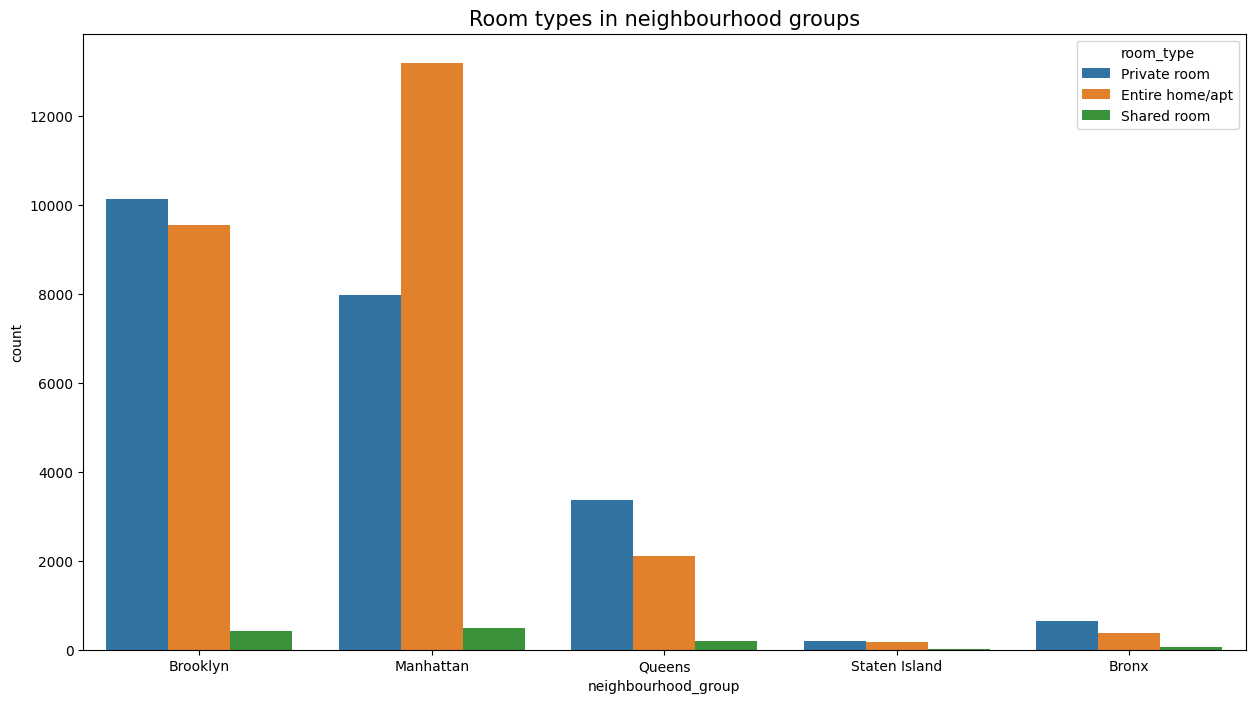

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title("Room types in neighbourhood groups", fontsize=15)
plt.show()

## Heatmap

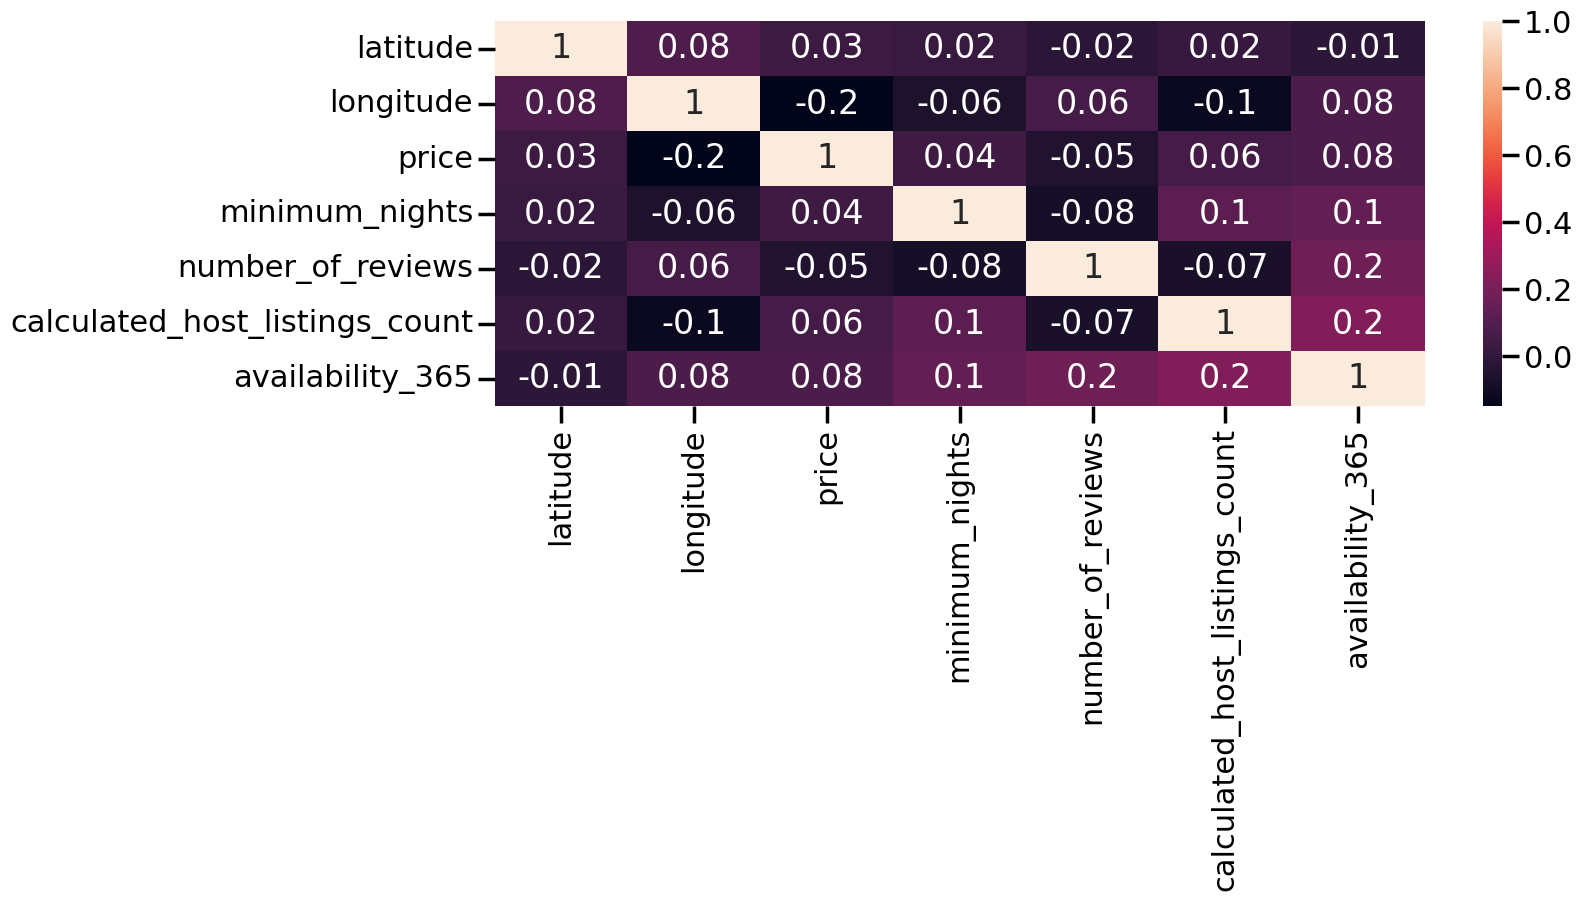

In [42]:
sns.set_context('poster')
plt.figure(figsize=(15,5))
cor=df.drop('host_id',axis=1).corr()
sns.heatmap(cor, annot=True,fmt='.1g');

## Insights